In [5]:
%matplotlib inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from collections import Counter 

In [13]:
# Flag on whether to use train or dev
TRAIN_STATS = False

file_prefix = "train" if TRAIN_STATS else "dev"
print("Calculating Statistics on %s set..." % file_prefix)

# Open each file and read in each as a list
questions = open("%s.question" % file_prefix, "r").read().split("\n")
contexts = open("%s.context" % file_prefix, "r").read().split("\n")
spans = open("%s.span" % file_prefix, "r").read().split("\n")
answers = open("%s.answer" % file_prefix, "r").read().split("\n")

Calculating Statistics on dev set...


In [15]:
# Get number of dev examples
assert(len(questions) == len(contexts) == len(spans) == len(answers))
N = len(questions)
print("Number of Examples: %s" % N)

Number of Examples: 10392


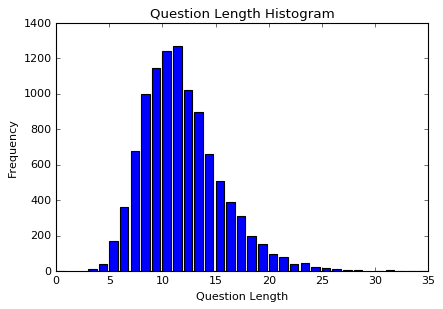

Most Frequent Values:
11 (with Frequency: 1271)
10 (with Frequency: 1242)
9 (with Frequency: 1148)
12 (with Frequency: 1024)
8 (with Frequency: 999)

Mean:
324.75


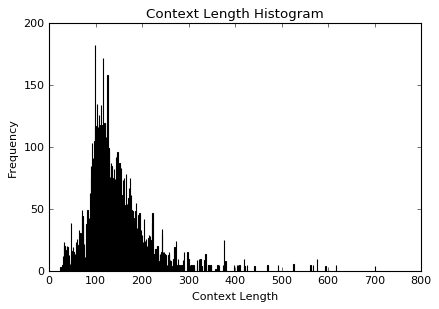

Most Frequent Values:
98 (with Frequency: 182)
116 (with Frequency: 172)
125 (with Frequency: 158)
102 (with Frequency: 135)
111 (with Frequency: 134)

Mean:
35.9584775087


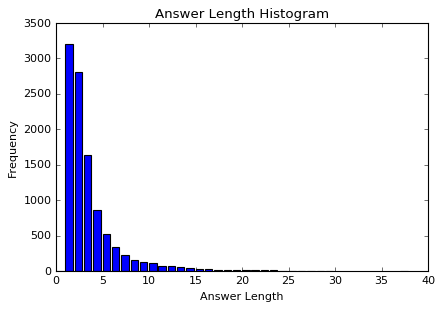

Most Frequent Values:
1 (with Frequency: 3197)
2 (with Frequency: 2807)
3 (with Frequency: 1638)
4 (with Frequency: 862)
5 (with Frequency: 516)

Mean:
335.225806452


In [16]:
def create_histogram_from_counter(counter, name):
    labels, values = zip(*counter.items())
    
    # Plot Histogram
    plt.bar(labels, values)
    plt.title("%s Histogram" % name)
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.show()
    
    print_statistics_from_counter(counter)

def print_statistics_from_counter(counter):
    modes = counter.most_common(5)
    mean = sum(counter.values()) / float(len(counter))
    
    print("Most Frequent Values:")
    for mode in modes:
        print("%s (with Frequency: %s)" % (mode[0], mode[1]))
    print("")
    print("Mean:")
    print(mean)
    
# Get counters from each list
question_counter = Counter([len(q.split()) for q in questions])
context_counter = Counter([len(c.split()) for c in contexts])
answer_counter = Counter([len(a.split()) for a in answers])
    
# Create length histogram
create_histogram_from_counter(question_counter, "Question Length")
create_histogram_from_counter(context_counter, "Context Length")
create_histogram_from_counter(answer_counter, "Answer Length")

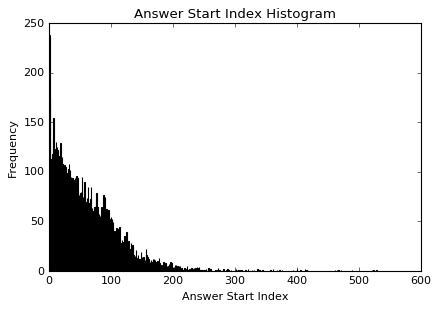

Most Frequent Values:
0 (with Frequency: 238)
1 (with Frequency: 174)
7 (with Frequency: 154)
6 (with Frequency: 133)
11 (with Frequency: 130)

Mean:
34.2937293729


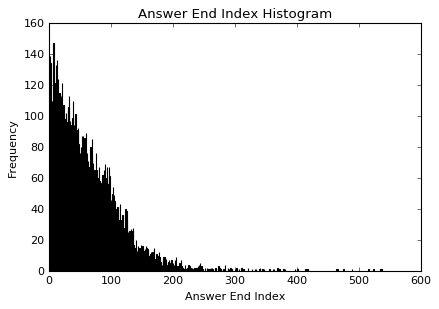

Most Frequent Values:
7 (with Frequency: 147)
1 (with Frequency: 139)
12 (with Frequency: 136)
2 (with Frequency: 134)
11 (with Frequency: 133)

Mean:
34.1809210526


In [17]:
# Get counters from each list
def split_spans(spans):
    span_starts = []
    span_ends = []
    span_lists = list([s.split() for s in spans])
    for s_list in span_lists:
        for idx, item in enumerate(s_list):
            if idx % 2 == 0:
                span_starts.append(int(item))
            else:
                span_ends.append(int(item))
    return span_starts, span_ends

span_starts, span_ends = split_spans(spans)

# Create Histograms about where in the Context the Answer appears
create_histogram_from_counter(Counter(span_starts), "Answer Start Index")
create_histogram_from_counter(Counter(span_ends), "Answer End Index")